In [2]:
# Import Modules
import pandas as pd
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Display all of the columns
pd.set_option('display.max_columns', None)

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
import mlxtend
from mlxtend.plotting import plot_decision_regions

In [4]:
df= pd.read_csv(r'..\..\23-Project-4-Week-1\proj4grp2\processed_data.csv')

In [5]:
df

CustomerId  CreditScore       Age    Tenure   Balance  NumOfProducts  \
0       15634602    -0.326221  0.293517 -1.041760 -1.225848      -0.911583   
1       15647311    -0.440036  0.198164 -1.387538  0.117350      -0.911583   
2       15619304    -1.536794  0.293517  1.032908  1.333053       2.527057   
3       15701354     0.501521  0.007457 -1.387538 -1.225848       0.807737   
4       15737888     2.063884  0.388871 -1.041760  0.785728      -0.911583   
...          ...          ...       ...       ...       ...            ...   
9995    15606229     1.246488  0.007457 -0.004426 -1.225848       0.807737   
9996    15569892    -1.391939 -0.373958  1.724464 -0.306379      -0.911583   
9997    15584532     0.604988 -0.278604  0.687130 -1.225848      -0.911583   
9998    15682355     1.256835  0.293517 -0.695982 -0.022608       0.807737   
9999    15628319     1.463771 -1.041433 -0.350204  0.859965      -0.911583   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0             1               1         0.021886       1                 1   
1             0               1         0.216534       0                 0   
2             1               0         0.240687       1                 1   
3             0               0        -0.108918       0                 1   
4             1               1        -0.365276       0                 0   
...         ...             ...              ...     ...               ...   
9995          1               0        -0.066419       0                 1   
9996          1               1         0.027988       0                 1   
9997          0               1        -1.008643       1                 1   
9998          1               0        -0.125231       1                 0   
9999          1               0        -1.076370       0                 1   

      Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                     0                0              1            0  
1                     0                1              1            0  
2                     0                0              1            0  
3                     0                0              1            0  
4                     0                1              1            0  
...                 ...              ...            ...          ...  
9995                  0                0              0            1  
9996                  0                0              0            1  
9997                  0                0              1            0  
9998                  1                0              0            1  
9999                  0                0              1            0  

[10000 rows x 15 columns]

In [6]:
df1=df.drop(['CustomerId'], axis=1)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Age                10000 non-null  float64
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  float64
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  int64  
 10  Geography_Germany  10000 non-null  int64  
 11  Geography_Spain    10000 non-null  int64  
 12  Gender_Female      10000 non-null  int64  
 13  Gender_Male        10000 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 1.1 MB


In [8]:
import seaborn as sns

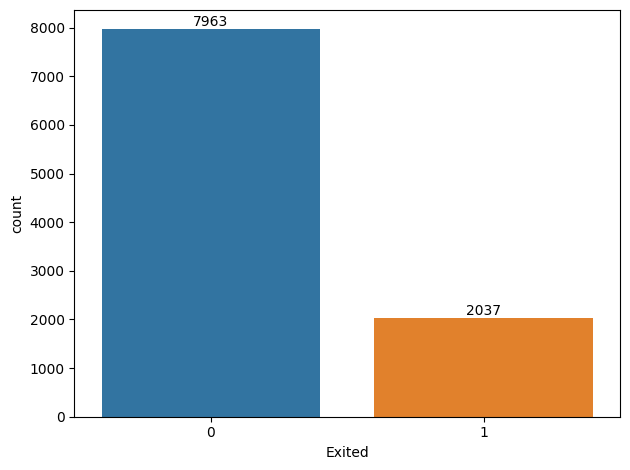

In [9]:
ax=sns.countplot(x="Exited", data = df1)
ax.bar_label(ax.containers[0], label_type='edge')
plt.tight_layout() 
plt.show()

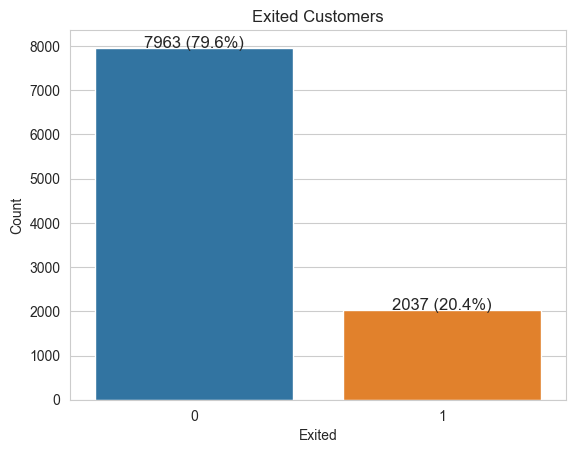

In [44]:
# Create a bar plot using seaborn
sns.set_style("whitegrid")
ax = sns.countplot(x="Exited", data=df1)
plt.title('Exited Customers')
plt.xlabel('Exited')
plt.ylabel('Count')

# Add count and percentage labels to the plot
total = len(df1)
for p in ax.patches:
    count = round(p.get_height())
    percentage = '{:.1f}%'.format(100 * count / total)
    x = p.get_x() + p.get_width() / 2 #place it in the centre of the top of the bar
    y = p.get_y() + p.get_height()
    ax.annotate('{} ({})'.format(count, percentage), (x, y), ha='center', fontsize=12)
    
plt.show()

In [24]:
dfunscaled=pd.read_csv(r'..\..\23-Project-4-Week-1\proj4grp2\Churn_Modelling.csv')

In [25]:
dfunscaled

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [39]:
dfunscaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [26]:
dfus2=dfunscaled.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'], axis=1)

In [27]:
dfus2

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  
0                  1        101348.88       1  
1                  1        112542.58       0  
2                  0        113931.57       1  
3                  0         93826.63       0  
4                  1         79084.10       0  
...              ...              ...     ...  
9995               0         96270.64       0  
9996               1        101699.77       0  
9997               1         42085.58       1  
9998               0         92888.52       1  
9999               0         38190.78       0  

[10000 rows x 9 columns]

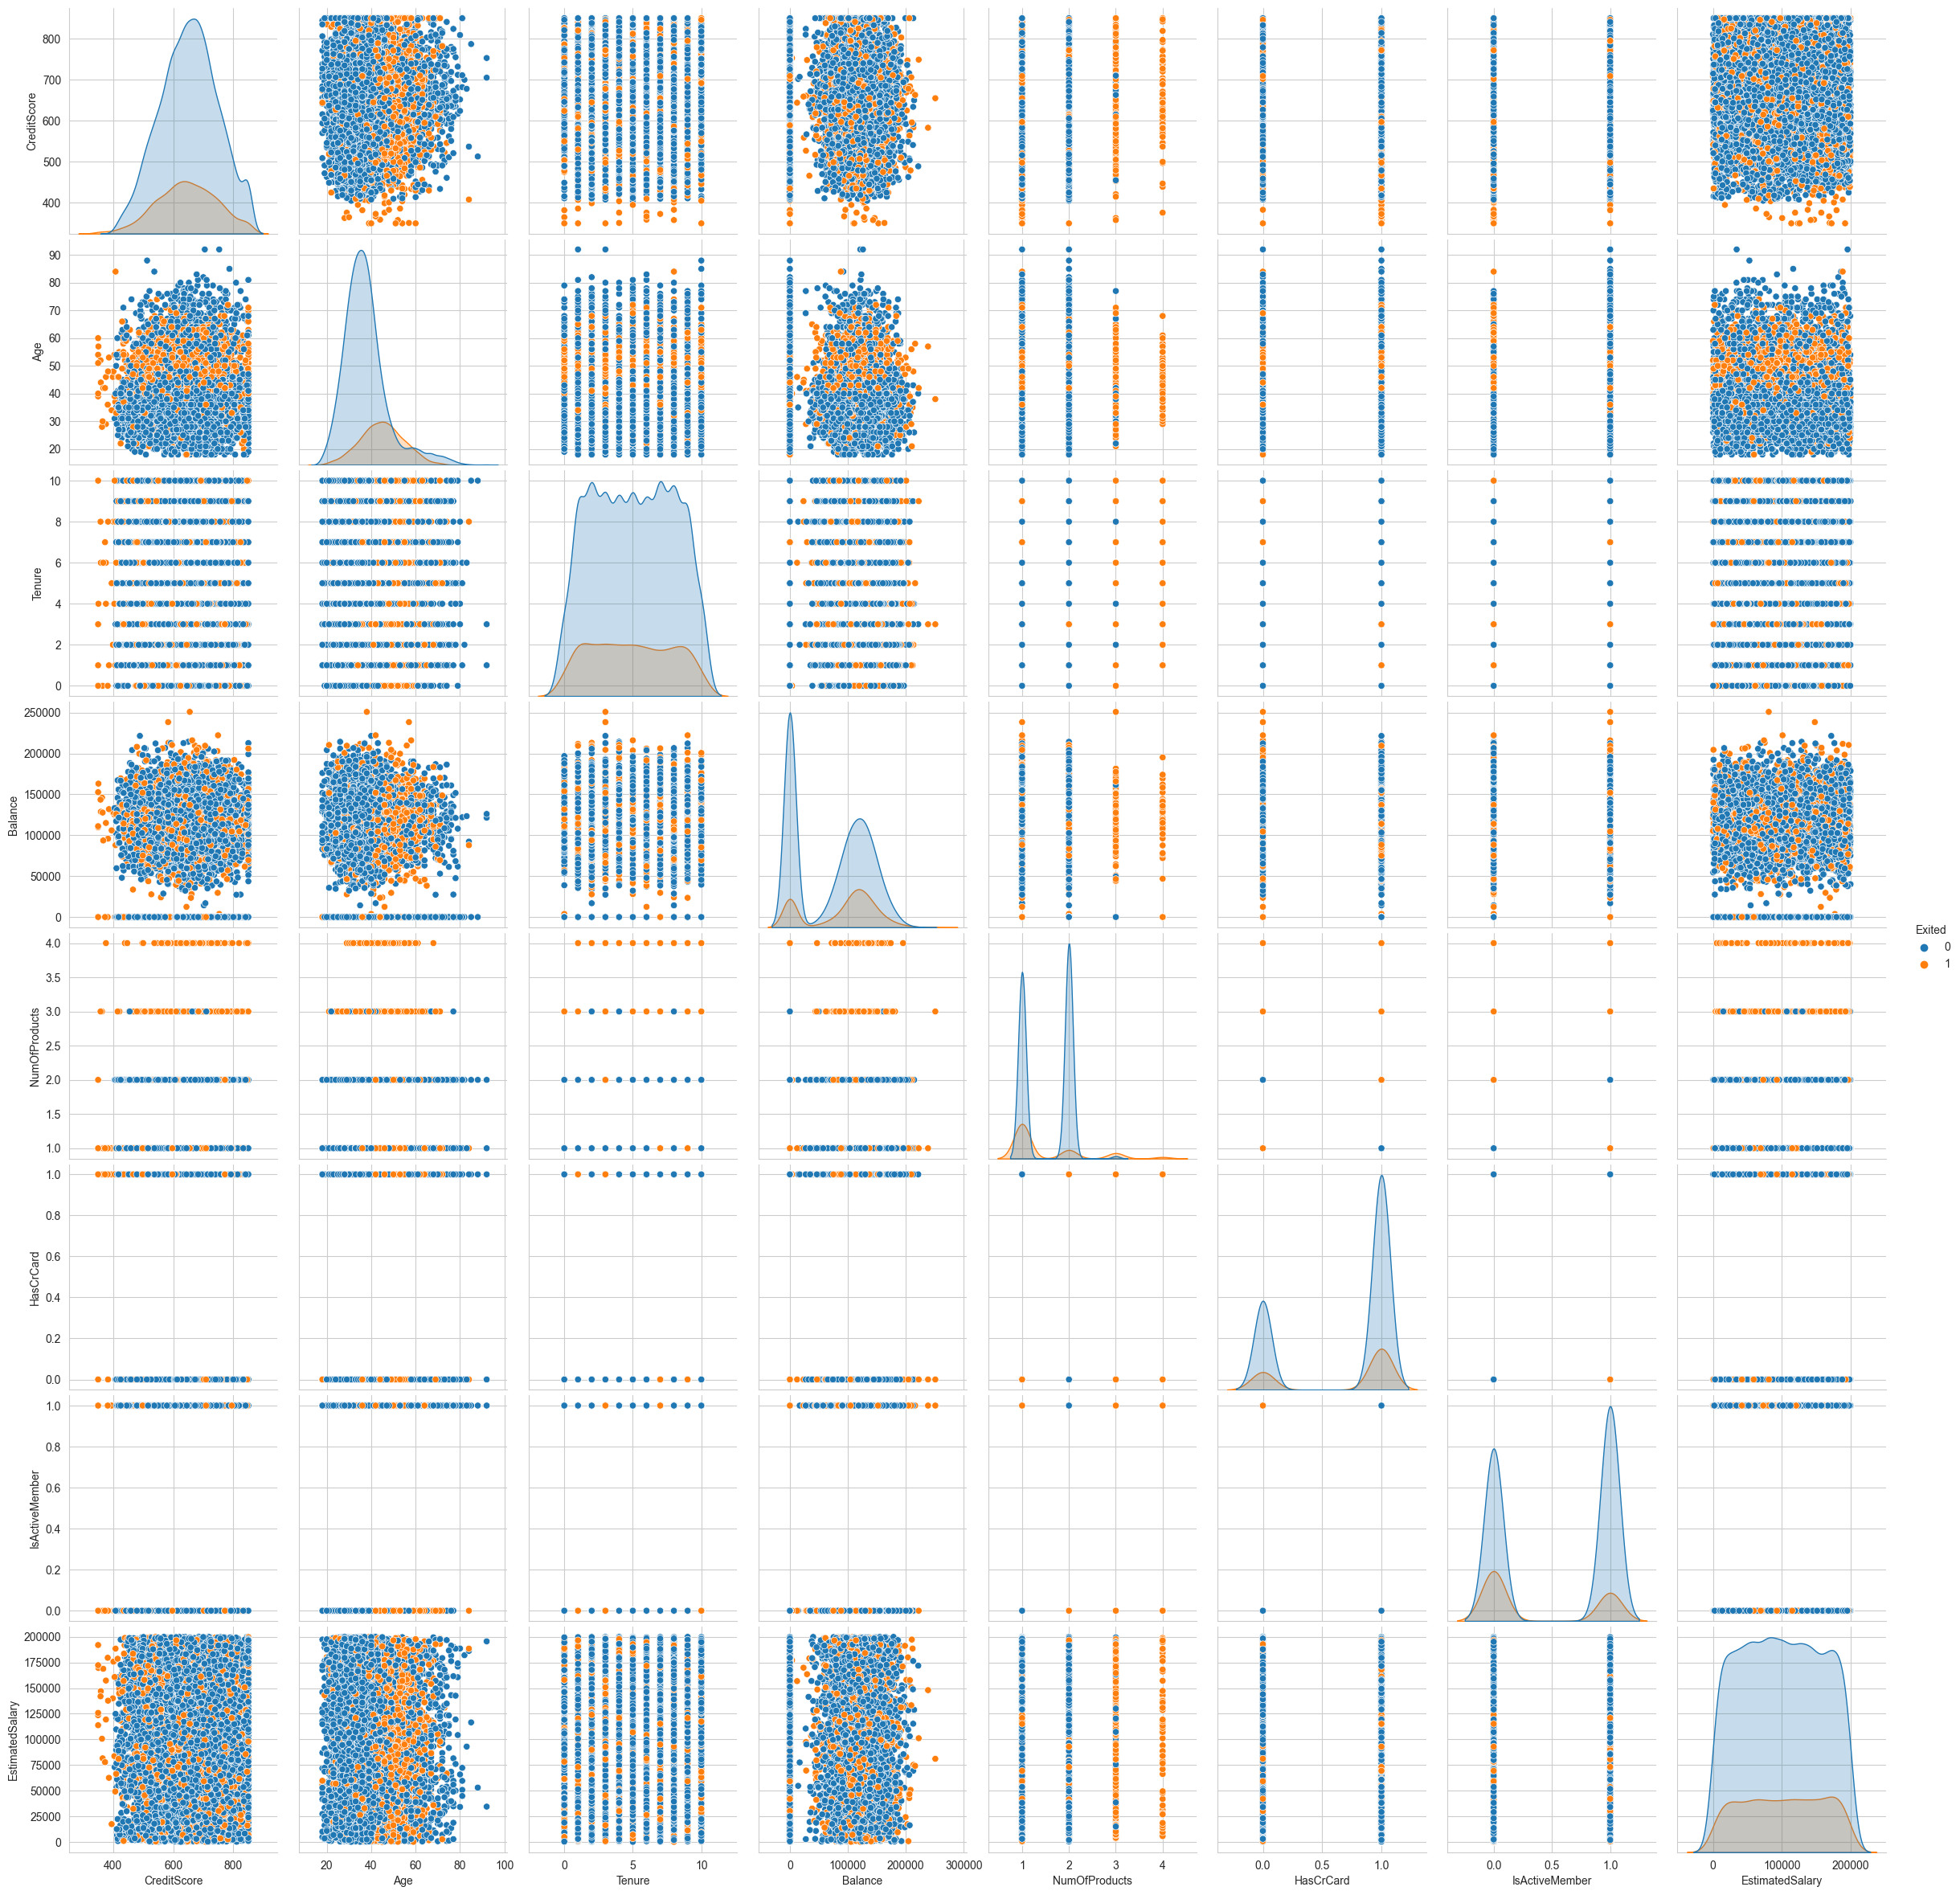

In [44]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(dfus2, hue='Exited', height=3);
plt.show()

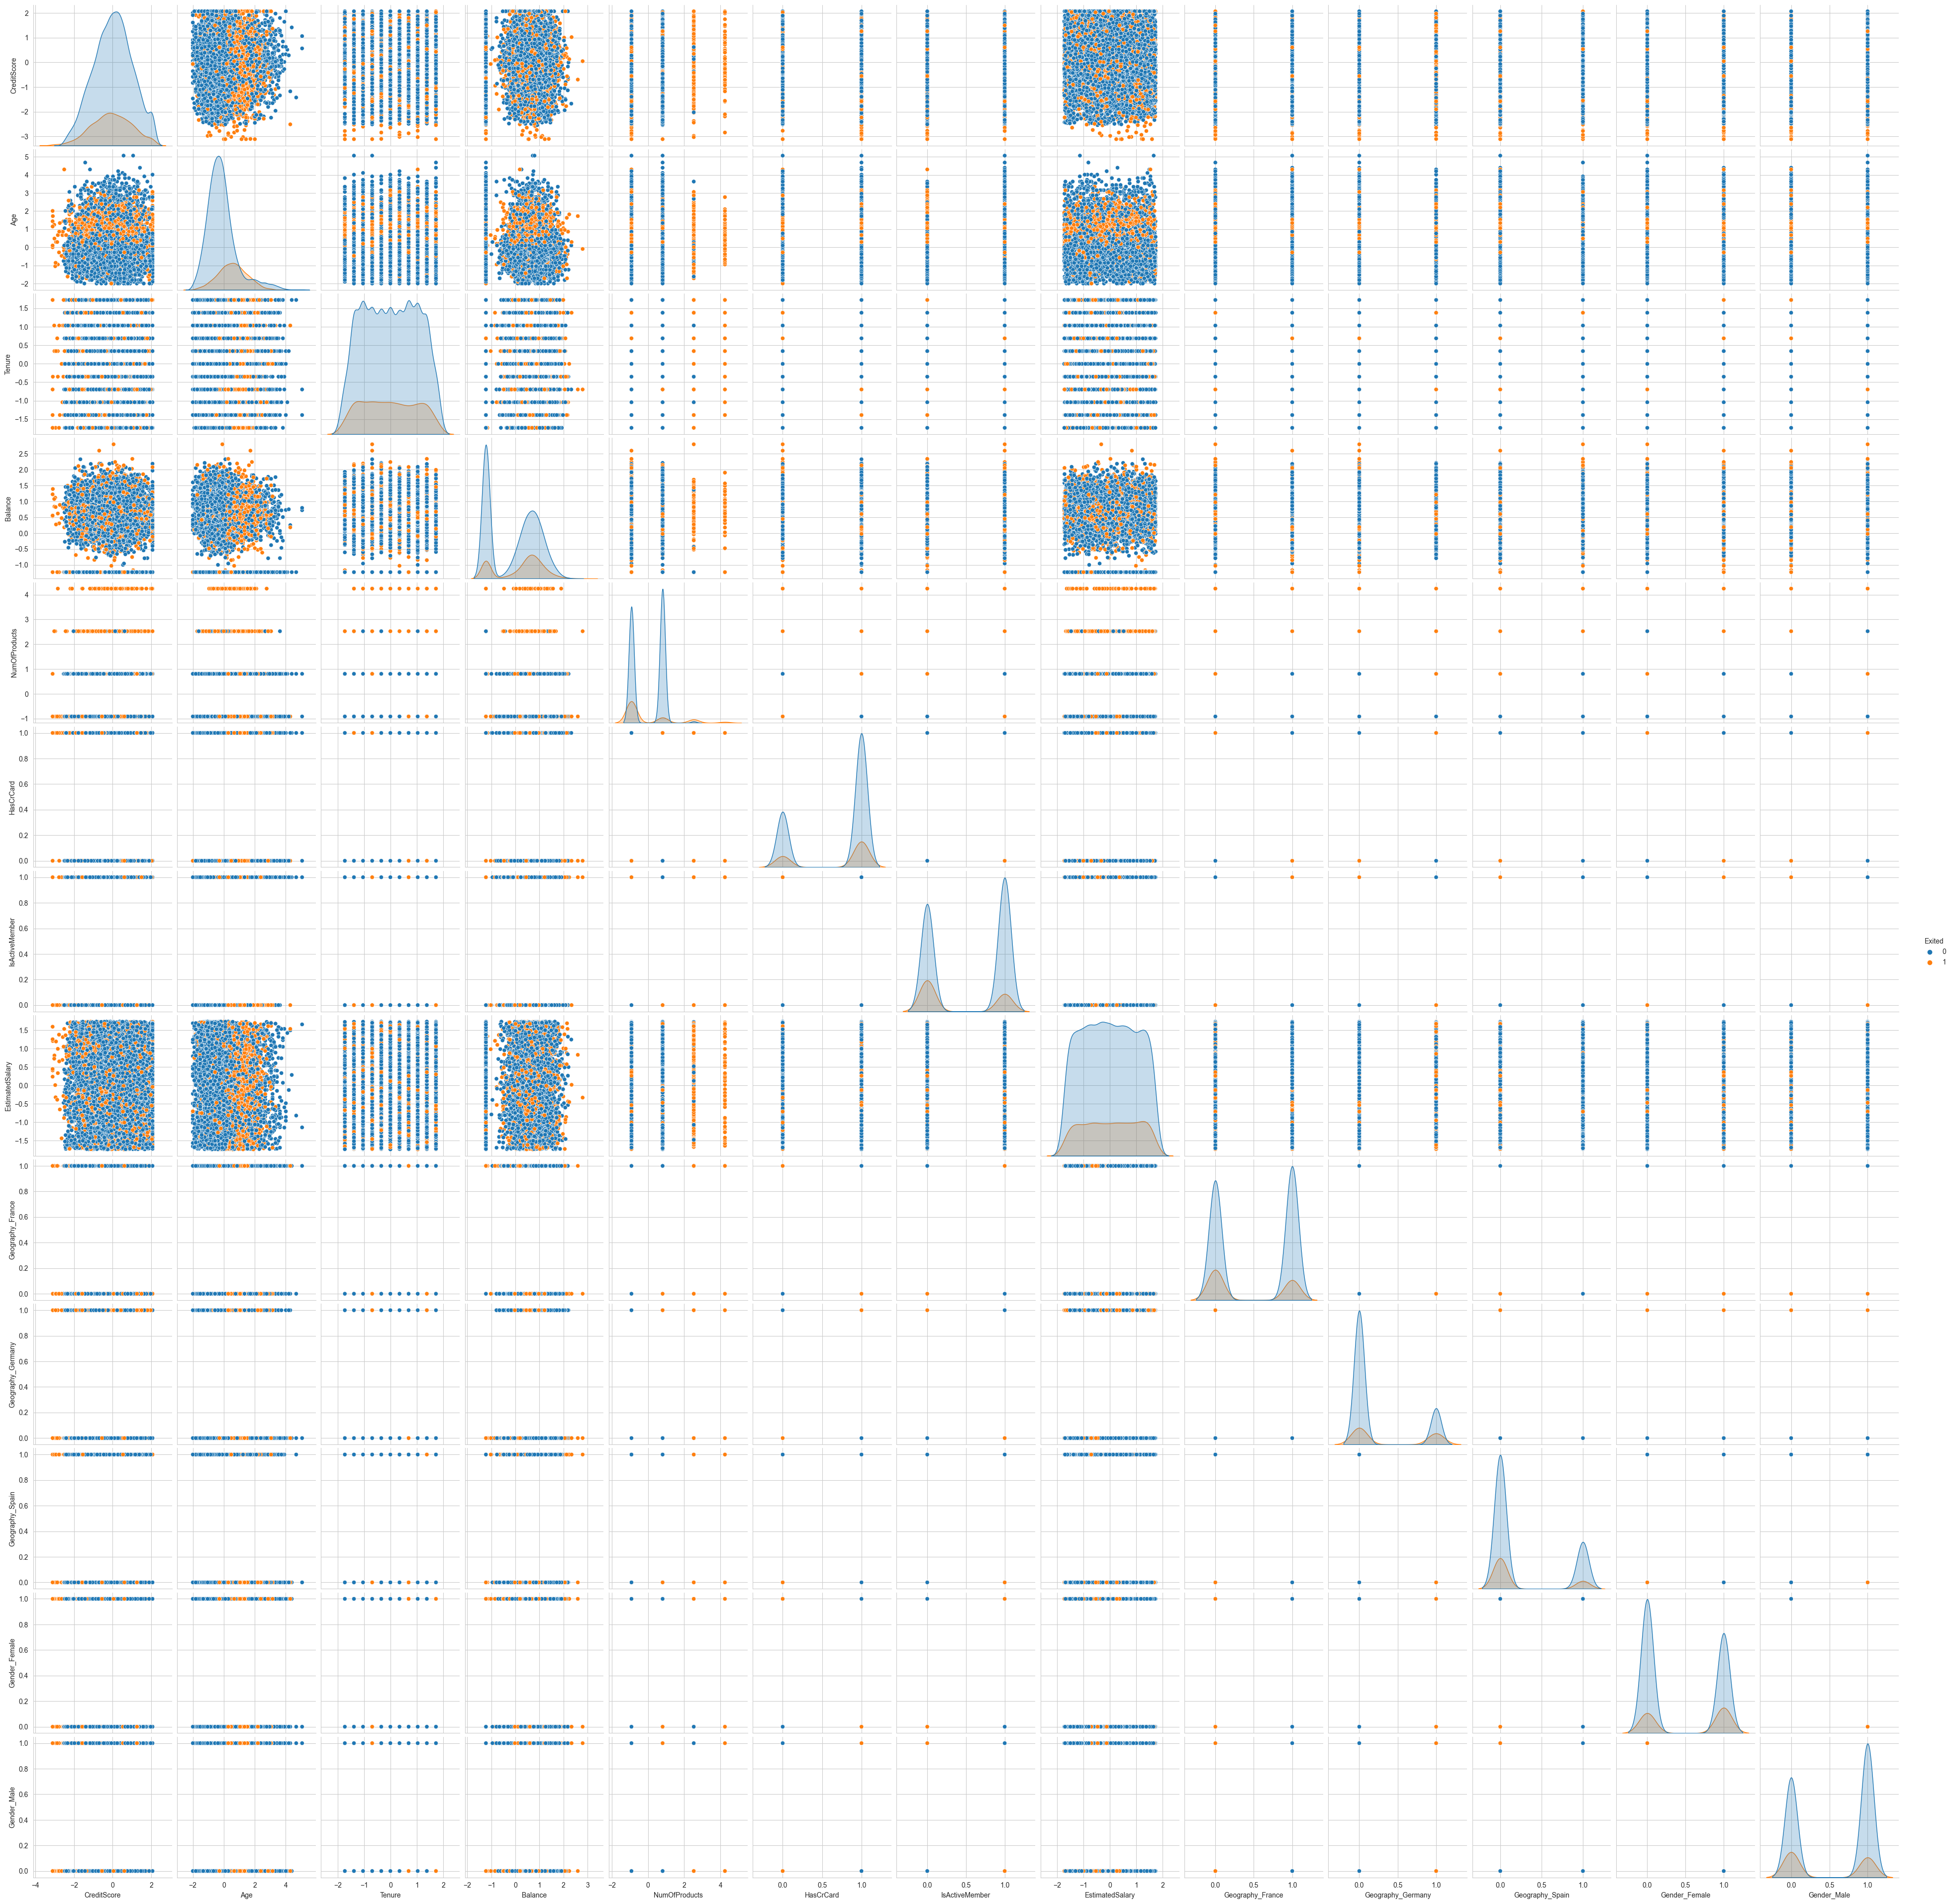

In [28]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(df1, hue='Exited', height=3);
plt.show()

In [80]:
y = df1['Exited']
X = df1.drop(columns='Exited')

<AxesSubplot:>

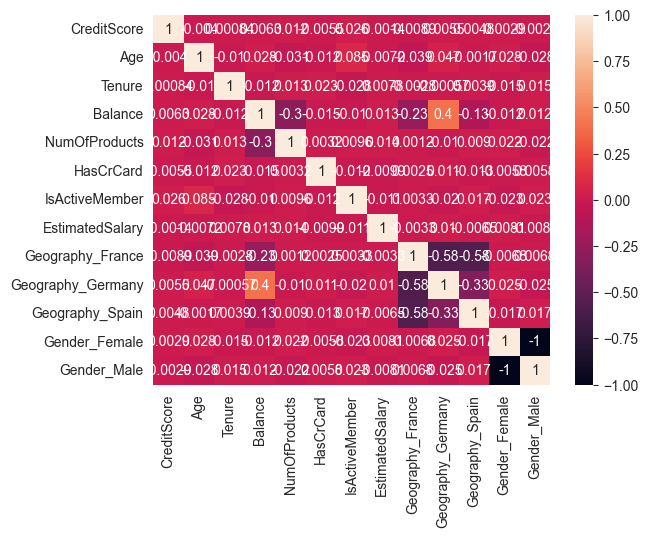

In [30]:
sns.heatmap(X.corr(), annot=True)

In [31]:
df2= pd.melt(df1, id_vars="Exited", var_name='indep variables', value_name='scaled value')

In [32]:
plt.figure()
sns.swarmplot(x = 'indep variables', y = 'scaled value', hue = 'Exited', data = df2)
plt.show()


KeyboardInterrupt: 

c:\Users\Kareem\anaconda3\envs\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 98.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Kareem\anaconda3\envs\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 98.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Error in callback <function flush_figures at 0x000001A1702AE168> (for post_execute):


KeyboardInterrupt: 

In [81]:
# split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print('Training set shape: ', X_train.shape, y_train.shape)
print('Testing set shape: ', X_test.shape, y_test.shape)
predictors=X_train.columns.values.tolist()
predictors

Training set shape:  (7500, 13) (7500,)
Testing set shape:  (2500, 13) (2500,)


['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_France',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Female',
 'Gender_Male']

In [72]:
# Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [82]:
from sklearn.feature_selection import chi2, SelectKBest, f_classif

In [83]:
import numpy as np
from sklearn import metrics

In [153]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# xscl=scaler.fit(X_train)
# xtrscld=xscl.transform(X_train)
# # xtr=sklearn.preprocessing.MinMaxScaler().fit_transform(X_train)

# # # Create the StandardScaler instance
# # scaler = StandardScaler()
# # # Fit the Standard Scaler with the training data
# # X_scaler = scaler.fit(X_train)
# # # Scale the training data
# # X_train_scaled = X_scaler.transform(X_train)
# # X_test_scaled = X_scaler.transform(X_test)

# y_train

In [16]:
# # Create the StandardScaler instance
# scaler = StandardScaler()
# # Fit the Standard Scaler with the training data
# X_scaler = scaler.fit(X_train)
# # Scale the training data
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

In [144]:
# #not doing as already scaled
# from sklearn import preprocessing
# X_trainv2 = preprocessing.StandardScaler().fit(X_train_2).transform(X_train_2.astype(float))
# X_testv2 = preprocessing.StandardScaler().fit(X_test_2).transform(X_test_2.astype(float))

In [47]:
# Get the two best(k = 2) features using the SelectKBest method , ft= f test
ft = SelectKBest(f_classif, k = 2).fit(X_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', X_train.columns)

Score:  [9.97957707e+00 6.41981506e+02 7.01737895e+00 1.12294789e+02
 2.27485556e+01 4.28930034e-01 1.64039849e+02 1.65535136e+00
 9.94858278e+01 2.43651292e+02 1.45093751e+01 8.98321206e+01
 8.98321206e+01]
Columns:  Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')


In [48]:
scores = -np.log10(ft.pvalues_)

scores

array([  2.79883549, 135.24142518,   2.09209697,  25.32751778,
         5.72554189,   0.29027688,  36.44019683,   0.70273891,
        22.55936257,  53.35302567,   3.85208357,  20.46777829,
        20.46777829])

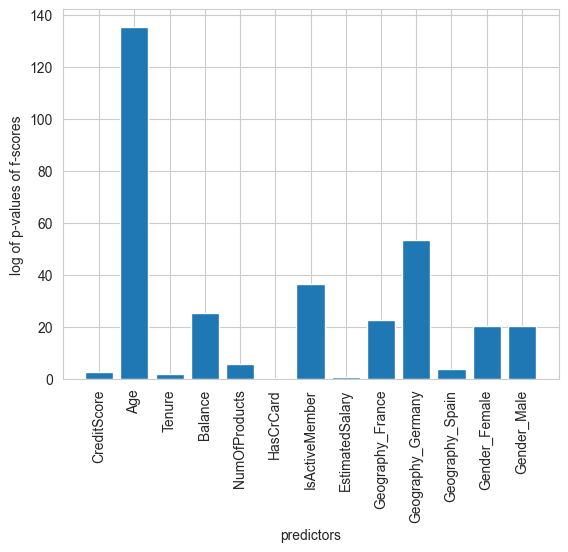

In [49]:
plt.bar(predictors, scores)
plt.xticks(rotation=90)
plt.xlabel('predictors')
plt.ylabel('log of p-values of f-scores')
plt.show()

In [53]:
X_train_2 = ft.transform(X_train)
X_test_2 = ft.transform(X_test)

In [54]:
#mean_acc2 = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train_2,y_train)
    yhat= knn.predict(X_test_2)
    mean_acc2[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc2

array([0.7532, 0.8104, 0.7652, 0.8104, 0.8088, 0.8136, 0.812 , 0.8136,
       0.814 , 0.8128, 0.8124, 0.8128, 0.812 , 0.8172, 0.8036, 0.8032,
       0.8032, 0.8072, 0.8088, 0.814 ])

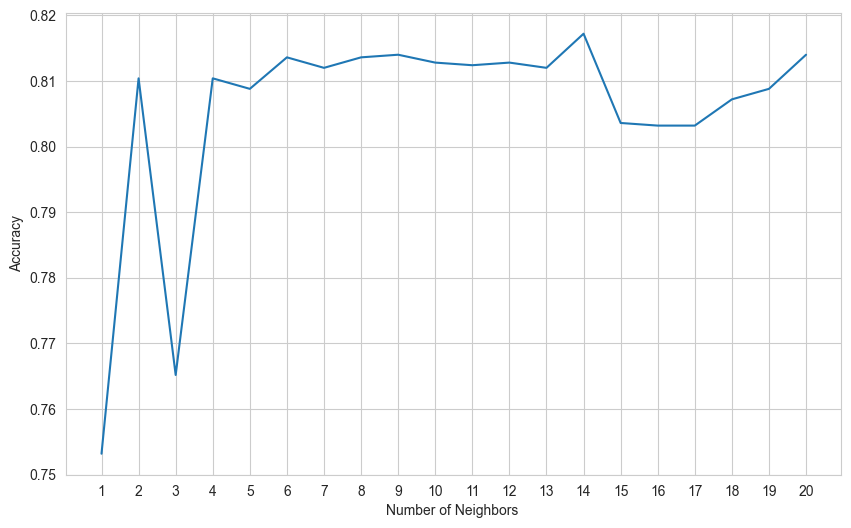

In [55]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc2)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [56]:
#for all features/variables
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.7948, 0.8364, 0.828 , 0.8392, 0.8404, 0.8404, 0.8436, 0.846 ,
       0.8512, 0.8476, 0.844 , 0.8476, 0.8488, 0.8496, 0.8536, 0.85  ,
       0.8516, 0.8492, 0.8512, 0.8504])

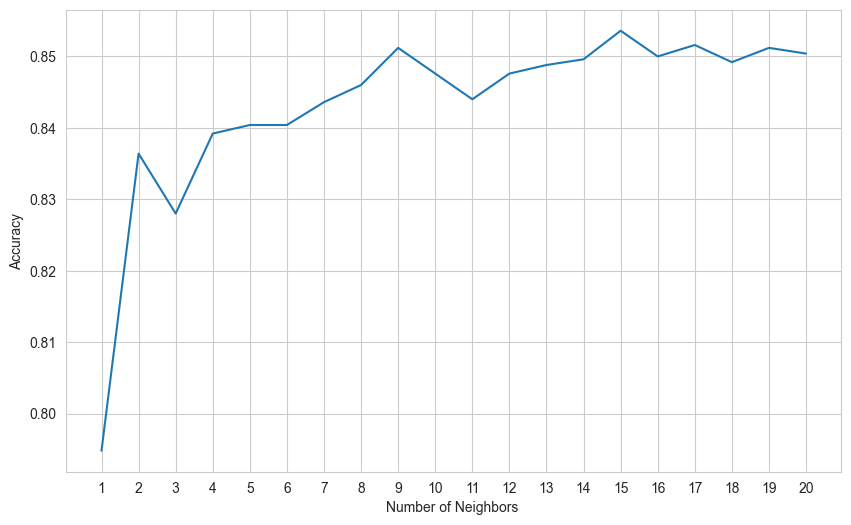

In [57]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()


In [84]:
X[:5]

CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0    -0.326221  0.293517 -1.041760 -1.225848      -0.911583          1   
1    -0.440036  0.198164 -1.387538  0.117350      -0.911583          0   
2    -1.536794  0.293517  1.032908  1.333053       2.527057          1   
3     0.501521  0.007457 -1.387538 -1.225848       0.807737          0   
4     2.063884  0.388871 -1.041760  0.785728      -0.911583          1   

   IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0               1         0.021886                 1                  0   
1               1         0.216534                 0                  0   
2               0         0.240687                 1                  0   
3               0        -0.108918                 1                  0   
4               1        -0.365276                 0                  0   

   Geography_Spain  Gender_Female  Gender_Male  
0                0              1            0  
1                1              1            0  
2                0              1            0  
3                0              1            0  
4                1              1            0

In [59]:
#X = pd.get_dummies(X)

In [85]:
X.head()

CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0    -0.326221  0.293517 -1.041760 -1.225848      -0.911583          1   
1    -0.440036  0.198164 -1.387538  0.117350      -0.911583          0   
2    -1.536794  0.293517  1.032908  1.333053       2.527057          1   
3     0.501521  0.007457 -1.387538 -1.225848       0.807737          0   
4     2.063884  0.388871 -1.041760  0.785728      -0.911583          1   

   IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0               1         0.021886                 1                  0   
1               1         0.216534                 0                  0   
2               0         0.240687                 1                  0   
3               0        -0.108918                 1                  0   
4               1        -0.365276                 0                  0   

   Geography_Spain  Gender_Female  Gender_Male  
0                0              1            0  
1                1              1            0  
2                0              1            0  
3                0              1            0  
4                1              1            0

In [109]:
X_train.shape

(7500, 13)

In [110]:
X_test.shape

(2500, 13)

In [88]:
# Instantiate the model with k = 6 neighbors
model = KNeighborsClassifier(n_neighbors=6)

In [89]:
# Train the model
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [90]:
# Create predictions
y_pred = model.predict(X_test)

# Review the predictions
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
# Print confusion matrix
confusion_matrix(y_pred,y_test)

array([[1903,  311],
       [  88,  198]], dtype=int64)

In [92]:
# Print classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2214
           1       0.39      0.69      0.50       286

    accuracy                           0.84      2500
   macro avg       0.67      0.78      0.70      2500
weighted avg       0.89      0.84      0.86      2500



In [93]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8404


In [94]:
#hyperparameter optimisation

from sklearn.model_selection import GridSearchCV


In [95]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [96]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=5, n_jobs = -1)

In [97]:
g_res = gs.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [98]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'distance'}

In [99]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute')

In [100]:
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [101]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  0.8802666666666666
Test set accuracy:  0.8404


In [102]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_knn))

[[1864  127]
 [ 272  237]]


In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1991
           1       0.65      0.47      0.54       509

    accuracy                           0.84      2500
   macro avg       0.76      0.70      0.72      2500
weighted avg       0.83      0.84      0.83      2500



In [104]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv =5)

In [105]:
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.8358000000000001


In [111]:
# Instantiate the model with k = 9 neighbors
model = KNeighborsClassifier(n_neighbors=9)

In [112]:
# Train the model
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [113]:
# Create predictions
y_pred = model.predict(X_test)

# Review the predictions
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [114]:
# Print confusion matrix
confusion_matrix(y_pred,y_test)

array([[1890,  271],
       [ 101,  238]], dtype=int64)

In [115]:
# Print classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      2161
           1       0.47      0.70      0.56       339

    accuracy                           0.85      2500
   macro avg       0.71      0.79      0.74      2500
weighted avg       0.88      0.85      0.86      2500



In [116]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8512


In [117]:
#hyperparameter optimisation - these get the same results as k=6

from sklearn.model_selection import GridSearchCV


In [118]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [119]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=5, n_jobs = -1)

In [120]:
g_res = gs.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [121]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'distance'}

In [122]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute')

In [123]:
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [124]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  0.8802666666666666
Test set accuracy:  0.8404


In [126]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_knn))

[[1864  127]
 [ 272  237]]


In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1991
           1       0.65      0.47      0.54       509

    accuracy                           0.84      2500
   macro avg       0.76      0.70      0.72      2500
weighted avg       0.83      0.84      0.83      2500



In [128]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv =5)

In [129]:
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.8358000000000001


In [131]:
#rpt for the selected ones only
X_train_2.shape

(7500, 2)

In [132]:
X_test_2.shape

(2500, 2)

In [133]:
# Instantiate the model with k = 6 neighbors
model = KNeighborsClassifier(n_neighbors=6)

In [134]:
# Train the model
model.fit(X_train_2, y_train)

KNeighborsClassifier(n_neighbors=6)

In [135]:
# Create predictions
y_pred_2 = model.predict(X_test_2)

# Review the predictions
y_pred_2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [136]:
# Print confusion matrix
confusion_matrix(y_pred_2,y_test)

array([[1920,  395],
       [  71,  114]], dtype=int64)

In [137]:
# Print classification report
print(classification_report(y_pred_2,y_test))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      2315
           1       0.22      0.62      0.33       185

    accuracy                           0.81      2500
   macro avg       0.59      0.72      0.61      2500
weighted avg       0.91      0.81      0.85      2500



In [138]:
accuracy = accuracy_score(y_test, y_pred_2)
print("Accuracy:", accuracy)

Accuracy: 0.8136


In [139]:
#hyperparameter optimisation

from sklearn.model_selection import GridSearchCV


In [140]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [141]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=5, n_jobs = -1)

In [142]:
g_res = gs.fit(X_train_2, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [143]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'uniform'}

In [151]:
knn = KNeighborsClassifier(n_neighbors = 15, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train_2, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=15)

In [152]:
# get a prediction
y_hat = knn.predict(X_train_2)
y_knn = knn.predict(X_test_2)

In [153]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  0.8162666666666667
Test set accuracy:  0.8176


In [154]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_knn))

[[1886  105]
 [ 351  158]]


In [155]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1991
           1       0.60      0.31      0.41       509

    accuracy                           0.82      2500
   macro avg       0.72      0.63      0.65      2500
weighted avg       0.79      0.82      0.79      2500



In [158]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv =5)
scores

array([0.833 , 0.8525, 0.8395, 0.8565, 0.8485])

In [160]:
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

0.8460 accuracy with a standard deviation of 0.0086


In [161]:
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.8460000000000001
